In [1]:
import networkx as nx
import gensim
import matplotlib.pyplot as plt
from matplotlib import style

In [2]:
s1 = 'http://rusvectores.org/static/models/rusvectores2/'
s2 = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'
# urllib.request.urlretrieve(s1 + s2, s2)

In [3]:
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

In [4]:
word_1 = 'волк_S'
words_list = list()
G = nx.Graph()
G.add_node(1, label=word_1.split('_')[0])
words_list.append(word_1)
label_dict = dict()
label_dict[1] = word_1.split('_')[0]

In [5]:
count = 1
if word_1 in model:
    for i in model.most_similar(positive=[word_1], topn=3):
        if i[1] >= 0.5:
            count += 1
            G.add_node(count)
            label_dict[count] = i[0].split('_')[0]
            G.add_edge(1, count)
            words_list.append(i[0])

In [6]:
oder = 1
for j in range(1, len(words_list)):
    oder += 1
    for i in model.most_similar(positive=[words_list[j]], topn=20):
        if i[1] >= 0.5 and i[0] not in words_list:
            count += 1
            G.add_node(count)
            label_dict[count] = i[0].split('_')[0]
            G.add_edge(oder, count)
            words_list.append(i[0])

c:\users\uladt\appdata\local\programs\python\python37-32\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


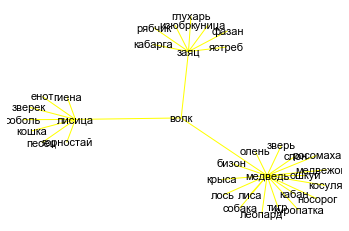

In [7]:
style.use('ggplot')
pos = nx.spring_layout(G)

nx.draw_networkx_nodes(G, pos, node_color='blue', node_size=0)
nx.draw_networkx_edges(G, pos, edge_color='yellow')
nx.draw_networkx_labels(G, pos, labels=label_dict,
                        with_labels=True, font_size=11, font_family='Arial')

plt.axis('off')
plt.show()